Saving netflix daily top 10.csv to netflix daily top 10 (1).csv
✅ Data Loaded Successfully!
        As of  Rank Year to Date Rank Last Week Rank  \
0  2020-04-01     1                 1              1   
1  2020-04-01     2                 2              -   
2  2020-04-01     3                 3              2   
3  2020-04-01     4                 4              -   
4  2020-04-01     5                 5              4   

                          Title     Type Netflix Exclusive  \
0  Tiger King: Murder, Mayhem …  TV Show               Yes   
1                         Ozark  TV Show               Yes   
2                  All American  TV Show               NaN   
3                  Blood Father    Movie               NaN   
4                  The Platform    Movie               Yes   

  Netflix Release Date  Days In Top 10  Viewership Score  
0         Mar 20, 2020               9                90  
1         Jul 21, 2017               5                45  
2         Mar 28, 201

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


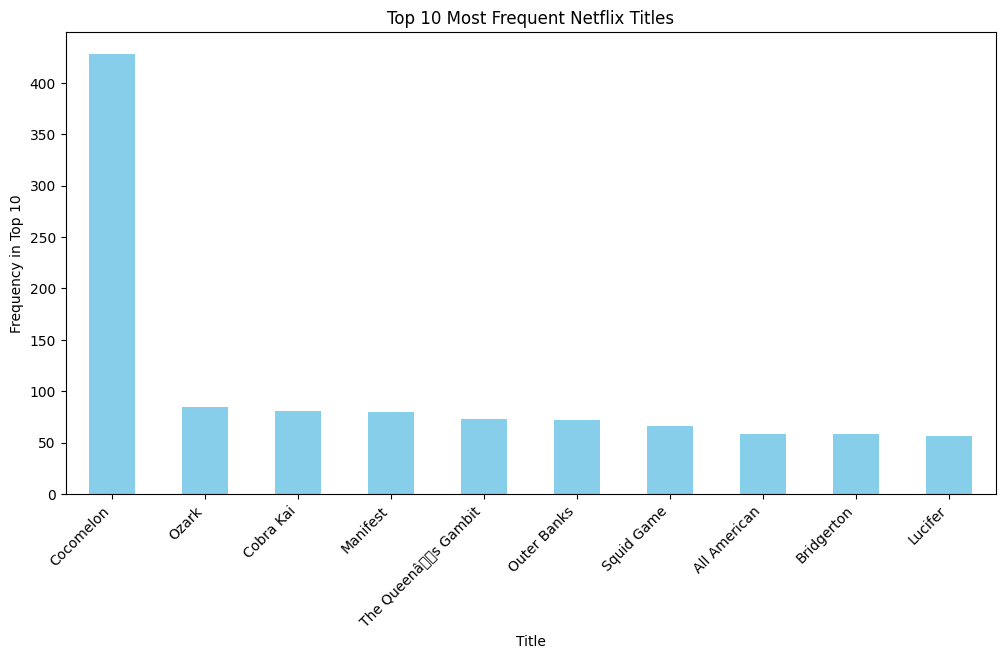

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


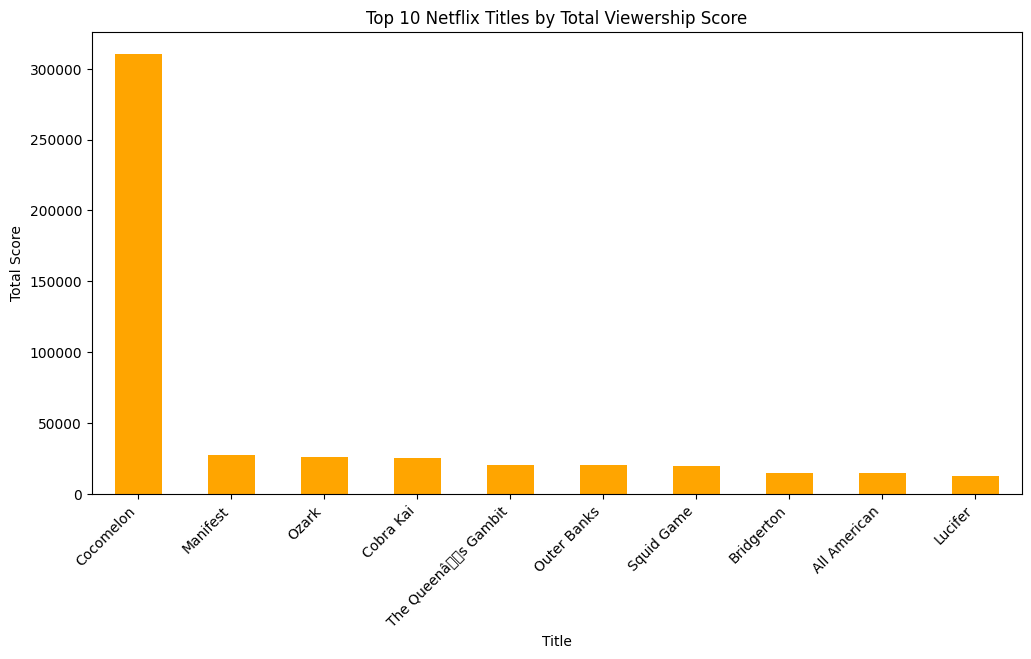

📂 Files Exported: netflix_cleaned.csv, top10_frequency.csv, top10_score.csv
✅ Data Saved to SQLite Database (netflix.db)


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3


from google.colab import files
uploaded = files.upload()


df = pd.read_csv("netflix daily top 10.csv")
print("✅ Data Loaded Successfully!")
print(df.head())
print(df.info())


df['As of'] = pd.to_datetime(df['As of'], errors='coerce')
df['year'] = df['As of'].dt.year
df['month'] = df['As of'].dt.month


top_freq = df['Title'].value_counts().head(10)
print("\n🎬 Top 10 Most Frequent Titles:\n", top_freq)

top_score = df.groupby("Title")["Viewership Score"].sum().sort_values(ascending=False).head(10)
print("\n🔥 Top 10 by Total Viewership Score:\n", top_score)

top_by_year = df.groupby('year')['Title'].agg(lambda x: x.value_counts().index[0])
print("\n🏆 Top Title by Year:\n", top_by_year)




top_freq.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title("Top 10 Most Frequent Netflix Titles")
plt.xlabel("Title")
plt.ylabel("Frequency in Top 10")
plt.xticks(rotation=45, ha='right')
plt.show()


top_score.plot(kind='bar', figsize=(12,6), color='orange')
plt.title("Top 10 Netflix Titles by Total Viewership Score")
plt.xlabel("Title")
plt.ylabel("Total Score")
plt.xticks(rotation=45, ha='right')
plt.show()


df.to_csv("netflix_cleaned.csv", index=False)
top_freq.to_csv("top10_frequency.csv")
top_score.to_csv("top10_score.csv")

print("📂 Files Exported: netflix_cleaned.csv, top10_frequency.csv, top10_score.csv")


conn = sqlite3.connect("netflix.db")
df.to_sql("netflix_top10", conn, if_exists="replace", index=False)
conn.close()

print("✅ Data Saved to SQLite Database (netflix.db)")


In [ ]:
from google.colab import files
files.download("netflix_cleaned.csv")
files.download("top10_frequency.csv")
files.download("top10_score.csv")
files.download("netflix.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("netflix.db")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>